In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-dataset/Sample_submission.csv
/kaggle/input/housing-dataset/Housing_dataset_test.csv
/kaggle/input/housing-dataset/Housing_dataset_train.csv


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # data visualization
import seaborn as sns  # enhanced data visualization

## Imported Datasets

In [3]:
train = pd.read_csv("/kaggle/input/housing-dataset/Housing_dataset_train.csv",low_memory=False)
test = pd.read_csv("/kaggle/input/housing-dataset/Housing_dataset_test.csv",low_memory=False)

In [4]:
train

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898
...,...,...,...,...,...,...,...
13995,6175,Edo,Bungalow,NaN,7.0,NaN,2367927.861
13996,9704,Kaduna,Apartment,NaN,7.0,5.0,2228516.471
13997,11190,Plateau,Bungalow,8.0,6.0,5.0,2406812.693
13998,9256,Delta,Flat,NaN,6.0,1.0,3348918.718


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


<Axes: xlabel='price', ylabel='Count'>

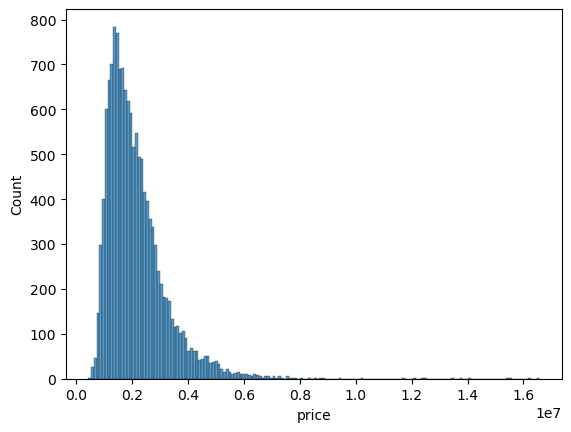

In [6]:
sns.histplot(x = 'price', data = train)

In [7]:
med = train.median()

/tmp/ipykernel_32/4170424853.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  med = train.median()


In [8]:
train.fillna(med, inplace=True)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        14000 non-null  float64
 4   bathroom       14000 non-null  float64
 5   parking_space  14000 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


In [10]:
train.dropna(inplace = True)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10531 entries, 0 to 13998
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             10531 non-null  int64  
 1   loc            10531 non-null  object 
 2   title          10531 non-null  object 
 3   bedroom        10531 non-null  float64
 4   bathroom       10531 non-null  float64
 5   parking_space  10531 non-null  float64
 6   price          10531 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 658.2+ KB


In [12]:
train['title'].unique()

array(['Semi-detached duplex', 'Apartment', 'Detached duplex',
       'Terrace duplex', 'Mansion', 'Bungalow', 'Penthouse', 'Townhouse',
       'Flat', 'Cottage'], dtype=object)

## Features Engineering

In [13]:
def feat(data):
    data['room_conv'] = data['bedroom'] / data['bathroom']
    data['size'] = data['bedroom'] + data['bathroom'] + data['parking_space']
    data['occup'] = data['bedroom'] / data['parking_space']

In [14]:
feat(train)
feat(test)

In [15]:
def feat1(data):
    def classify_property_type(x):
        if x in ['Semi-detached duplex', 'Detached duplex', 'Terrace duplex']:
            return 3
        elif x in ['Bungalow', 'Townhouse', 'Flat', 'Cottage', 'Apartment']:
            return 2
        elif x in ['Mansion']:
            return 5
        else:
            return 4

    data['type'] = data['title'].apply(classify_property_type)
feat1(train)

In [16]:
feat1(train)
feat1(test)

In [17]:
def feat(data):

    # Define a dictionary mapping each state to its corresponding geopolitical zone
    geopolitical_zones = {
        'North Central': ['Benue', 'Kogi', 'Kwara', 'Nasarawa', 'Niger', 'Plateau', 'Federal Capital Territory'],
        'North East': ['Adamawa', 'Bauchi', 'Borno', 'Gombe', 'Taraba', 'Yobe'],
        'North West': ['Jigawa', 'Kaduna', 'Kano', 'Katsina', 'Kebbi', 'Sokoto', 'Zamfara'],
        'South East': ['Abia', 'Anambra', 'Ebonyi', 'Enugu', 'Imo'],
        'South South': ['Akwa Ibom', 'Bayelsa', 'Cross River', 'Delta', 'Edo', 'Rivers'],
        'South West': ['Ekiti', 'Lagos', 'Ogun', 'Ondo', 'Osun', 'Oyo']
    }

    # Create new columns for each geopolitical zone and initialize them to 0
    for zone in geopolitical_zones:
        data[zone] = 0

    # Update the columns based on the mapping
    for zone, states in geopolitical_zones.items():
        data.loc[data['loc'].isin(states), zone] = 1
        
feat(train)
feat(test)

In [18]:
#Calculate the Target Means (Encodings) from the Training Set
target_means = train.groupby('title')['price'].mean().to_dict()

#Encode the Categorical Feature for Both Train and Validation Sets
train['new_title'] = train['title'].map(target_means)
test['new_title'] = test['title'].map(target_means)

In [19]:
#Calculate the Target Means (Encodings) from the Training Set
target_means = train.groupby('loc')['price'].mean().to_dict()

# Step 4: Encode the Categorical Feature for Both Train and Validation Sets
train['new_loc'] = train['loc'].map(target_means)
test['new_loc'] = test['loc'].map(target_means)

In [20]:
def feat(data):
    data.drop(columns = ['title', 'loc'], inplace = True)
    
feat(train)
feat(test)

In [21]:
train

,ID,bedroom,bathroom,parking_space,price,room_conv,size,occup,type,North Central,North East,North West,South East,South South,South West,new_title,new_loc
0,3583,2.0,2.0,1.0,1149999.565,1.000000,5.0,2.000000,3,0,0,1,0,0,0,1.908512e+06,1.951331e+06
1,2748,4.0,2.0,4.0,1672416.689,2.000000,10.0,1.000000,2,0,0,0,0,0,1,1.573772e+06,2.252539e+06
3,2224,5.0,2.0,4.0,2410306.756,2.500000,11.0,1.250000,3,0,0,0,1,0,0,2.208319e+06,2.364226e+06
4,10300,4.0,5.0,6.0,2600700.898,0.800000,15.0,0.666667,3,1,0,0,0,0,0,1.930154e+06,1.761459e+06
5,1733,4.0,1.0,3.0,1341750.867,4.000000,8.0,1.333333,5,0,1,0,0,0,0,3.712847e+06,1.713052e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13994,10477,8.0,1.0,6.0,2837199.086,8.000000,15.0,1.333333,3,0,1,0,0,0,0,2.208319e+06,1.853125e+06
13995,6175,4.0,7.0,3.0,2367927.861,0.571429,14.0,1.333333,2,0,0,0,0,1,0,1.732655e+06,2.304194e+06
13996,9704,4.0,7.0,5.0,2228516.471,0.571429,16.0,0.800000,2,0,0,1,0,0,0,1.573772e+06,1.868486e+06
13997,11190,8.0,6.0,5.0,2406812.693,1.333333,19.0,1.600000,2,1,0,0,0,0,0,1.732655e+06,1.926366e+06


In [22]:
test

,ID,bedroom,bathroom,parking_space,room_conv,size,occup,type,North Central,North East,North West,South East,South South,South West,new_title,new_loc
0,845,4,1,2,4.000000,7,2.0,4,0,0,1,0,0,0,2.622204e+06,2.098866e+06
1,1924,2,2,4,1.000000,8,0.5,2,0,1,0,0,0,0,1.573772e+06,1.881336e+06
2,10718,2,7,2,0.285714,11,1.0,2,0,1,0,0,0,0,1.732655e+06,1.881336e+06
3,12076,9,5,2,1.800000,16,4.5,5,0,0,0,0,0,1,3.712847e+06,4.205665e+06
4,12254,5,6,1,0.833333,12,5.0,3,0,1,0,0,0,0,1.908512e+06,1.846942e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1594,4,5,2,0.800000,11,2.0,2,0,0,0,0,0,1,1.727680e+06,2.107909e+06
5996,2416,5,7,1,0.714286,13,5.0,3,0,1,0,0,0,0,1.930154e+06,1.881336e+06
5997,10195,4,1,4,4.000000,9,1.0,2,0,0,0,0,0,1,2.044775e+06,2.287374e+06
5998,9455,3,7,5,0.428571,15,0.6,2,0,1,0,0,0,0,1.727680e+06,1.748597e+06


In [23]:
print(train.columns)

Index(['ID', 'bedroom', 'bathroom', 'parking_space', 'price', 'room_conv',
       'size', 'occup', 'type', 'North Central', 'North East', 'North West',
       'South East', 'South South', 'South West', 'new_title', 'new_loc'],
      dtype='object')


In [24]:
train.reset_index(drop=True, inplace = True)

In [25]:
train

,ID,bedroom,bathroom,parking_space,price,room_conv,size,occup,type,North Central,North East,North West,South East,South South,South West,new_title,new_loc
0,3583,2.0,2.0,1.0,1149999.565,1.000000,5.0,2.000000,3,0,0,1,0,0,0,1.908512e+06,1.951331e+06
1,2748,4.0,2.0,4.0,1672416.689,2.000000,10.0,1.000000,2,0,0,0,0,0,1,1.573772e+06,2.252539e+06
2,2224,5.0,2.0,4.0,2410306.756,2.500000,11.0,1.250000,3,0,0,0,1,0,0,2.208319e+06,2.364226e+06
3,10300,4.0,5.0,6.0,2600700.898,0.800000,15.0,0.666667,3,1,0,0,0,0,0,1.930154e+06,1.761459e+06
4,1733,4.0,1.0,3.0,1341750.867,4.000000,8.0,1.333333,5,0,1,0,0,0,0,3.712847e+06,1.713052e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10526,10477,8.0,1.0,6.0,2837199.086,8.000000,15.0,1.333333,3,0,1,0,0,0,0,2.208319e+06,1.853125e+06
10527,6175,4.0,7.0,3.0,2367927.861,0.571429,14.0,1.333333,2,0,0,0,0,1,0,1.732655e+06,2.304194e+06
10528,9704,4.0,7.0,5.0,2228516.471,0.571429,16.0,0.800000,2,0,0,1,0,0,0,1.573772e+06,1.868486e+06
10529,11190,8.0,6.0,5.0,2406812.693,1.333333,19.0,1.600000,2,1,0,0,0,0,0,1.732655e+06,1.926366e+06


In [26]:
train

,ID,bedroom,bathroom,parking_space,price,room_conv,size,occup,type,North Central,North East,North West,South East,South South,South West,new_title,new_loc
0,3583,2.0,2.0,1.0,1149999.565,1.000000,5.0,2.000000,3,0,0,1,0,0,0,1.908512e+06,1.951331e+06
1,2748,4.0,2.0,4.0,1672416.689,2.000000,10.0,1.000000,2,0,0,0,0,0,1,1.573772e+06,2.252539e+06
2,2224,5.0,2.0,4.0,2410306.756,2.500000,11.0,1.250000,3,0,0,0,1,0,0,2.208319e+06,2.364226e+06
3,10300,4.0,5.0,6.0,2600700.898,0.800000,15.0,0.666667,3,1,0,0,0,0,0,1.930154e+06,1.761459e+06
4,1733,4.0,1.0,3.0,1341750.867,4.000000,8.0,1.333333,5,0,1,0,0,0,0,3.712847e+06,1.713052e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10526,10477,8.0,1.0,6.0,2837199.086,8.000000,15.0,1.333333,3,0,1,0,0,0,0,2.208319e+06,1.853125e+06
10527,6175,4.0,7.0,3.0,2367927.861,0.571429,14.0,1.333333,2,0,0,0,0,1,0,1.732655e+06,2.304194e+06
10528,9704,4.0,7.0,5.0,2228516.471,0.571429,16.0,0.800000,2,0,0,1,0,0,0,1.573772e+06,1.868486e+06
10529,11190,8.0,6.0,5.0,2406812.693,1.333333,19.0,1.600000,2,1,0,0,0,0,0,1.732655e+06,1.926366e+06


In [27]:
from sklearn.model_selection import KFold, StratifiedKFold
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [28]:
fold = KFold(n_splits=30, shuffle=True, random_state=45)
model = CatBoostRegressor( verbose = False)

In [29]:
X = train.drop(columns = ['ID', 'price'])
y = train['price']

In [30]:
# Define a custom function to calculate RMSE as it's not directly available in cross_val_score
def rmse_score(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Perform cross-validation and get the scores
scores = []
for fold, (train_index, test_index) in enumerate(fold.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test, verbose = False)
    score = rmse_score(y_test, y_pred)
    scores.append(score)

# Print the scores for each fold and the mean score
print("Cross-validation RMSE scores:", scores)
print("Mean Cross-validation RMSE:", np.mean(scores))

Cross-validation RMSE scores: [447378.4491570784, 367443.3196385913, 390185.7690026445, 393098.42913306487, 396812.63478498213, 368406.0901552235, 388471.07345280953, 349481.6749840048, 410545.17133446556, 606890.5138745514, 444551.8101365275, 395502.31498404033, 355252.7068853234, 389221.95240870566, 358169.17833066516, 594877.3055140288, 348860.8633520039, 306907.0645556504, 544606.7509375327, 463969.9490928756, 381583.60582815786, 368746.76513665036, 415827.0752317674, 539401.0569266758, 494744.5279388781, 386067.48174507514, 412751.6267902714, 380071.2591959915, 510692.56910491345, 403034.7298295636]
Mean Cross-validation RMSE: 420451.7906480905


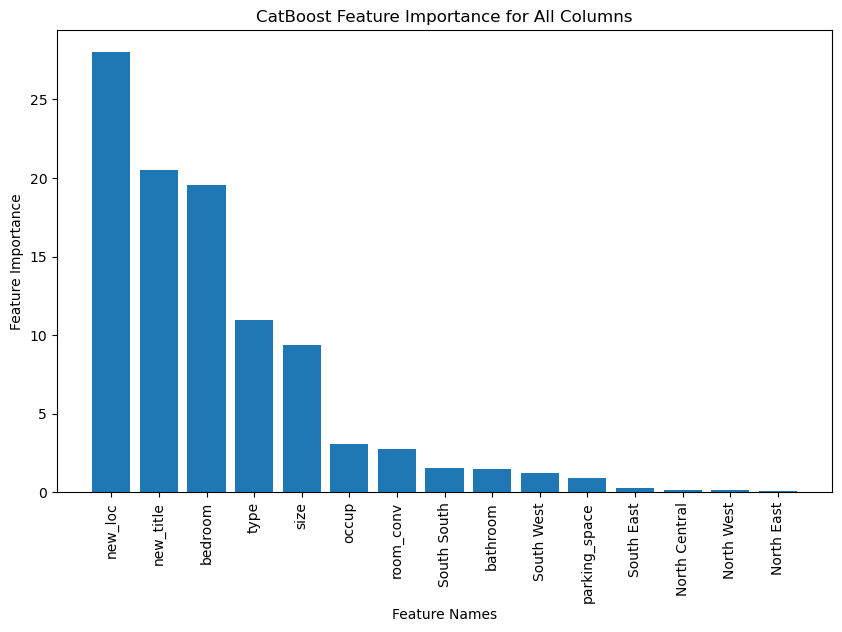

In [40]:
# Plot feature importance for all columns
feature_importance = model.get_feature_importance()
feature_names = X_train.columns

# Sort feature importance in descending order
sorted_idx = feature_importance.argsort()[::-1]

# Plot the importance of all features
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_names)), feature_importance[sorted_idx], align="center")
plt.xticks(range(len(feature_names)), feature_names[sorted_idx], rotation=90)
plt.xlabel("Feature Names")
plt.ylabel("Feature Importance")
plt.title("CatBoost Feature Importance for All Columns")
plt.show()


In [43]:
feature_importance = model.get_feature_importance()
feature_names = X_train.columns

# Create a list of tuples with feature names and their importance scores
feature_importance_list = list(zip(feature_names, feature_importance))

# Sort the list in descending order based on importance scores
feature_importance_list_sorted = sorted(feature_importance_list, key=lambda x: x[1], reverse=True)

# Print the sorted list
for feature, importance in feature_importance_list_sorted:
    print(f"{feature}: {importance}")


new_loc: 28.018083350237955
new_title: 20.514683864991927
bedroom: 19.554140457133617
type: 10.954908463994316
size: 9.383225562763434
occup: 3.049217879114549
room_conv: 2.715672223403668
South South: 1.5629247517199976
bathroom: 1.4645289340707213
South West: 1.200060630069687
parking_space: 0.928954931893282
South East: 0.2644953427293303
North Central: 0.15992087093169274
North West: 0.14244748509693647
North East: 0.08673525184887533


In [31]:
ID = test['ID']
test.drop(columns = ['ID'], inplace = True)

In [32]:
#model.fit(X,y)
sub_df = model.predict(test)

In [33]:
test['price'] = sub_df
test['ID'] = ID
try_df = test[['ID', 'price']]

In [34]:
try_df.to_csv('Submissions_30_splits_cb.csv',index=False)